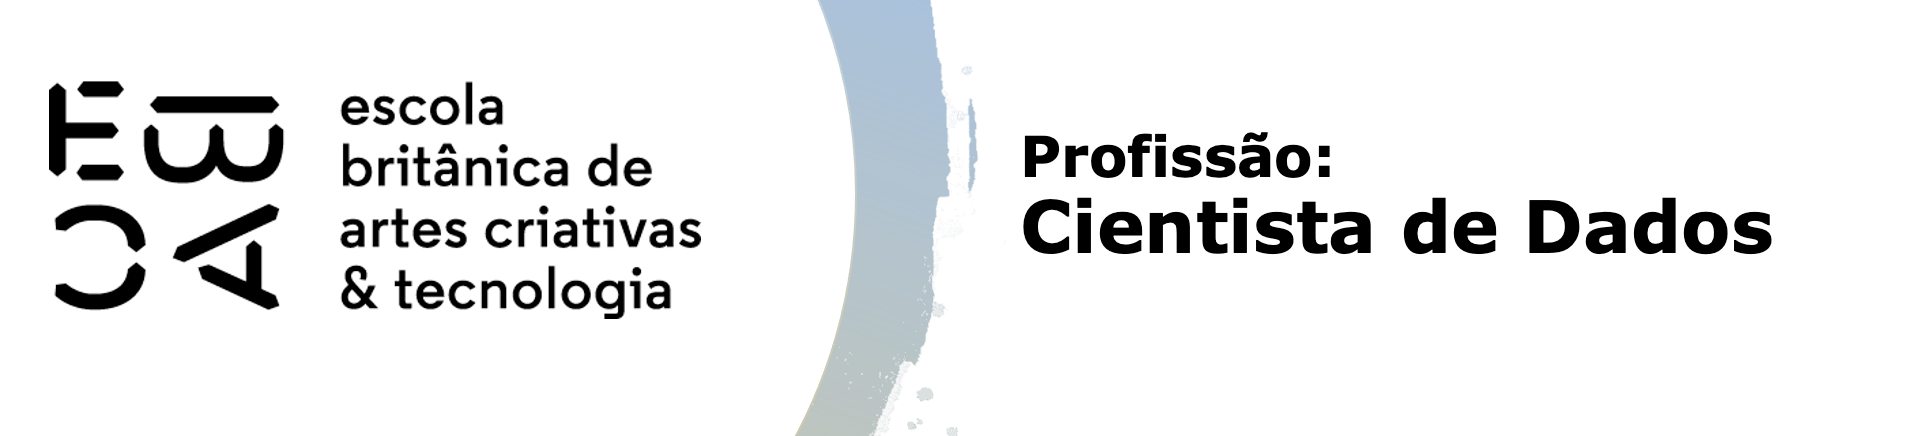

# Tarefa

In [83]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pg = sns.load_dataset('penguins')

In [84]:
pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


<Axes: xlabel='sex', ylabel='body_mass_g'>

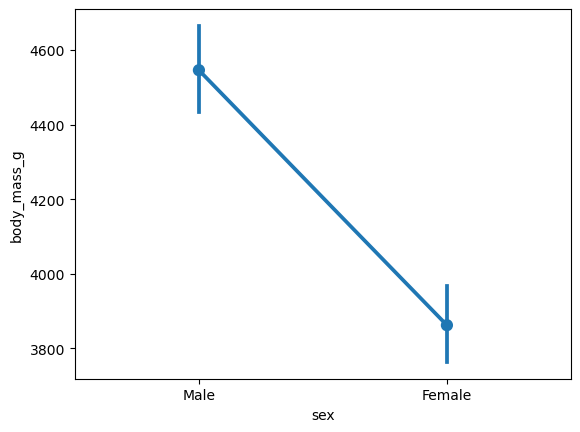

In [85]:
sns.pointplot(data=pg, x='sex', y = 'body_mass_g')

In [86]:
pg = pg.dropna()

In [87]:
pg.shape

(333, 7)

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

In [88]:
significancia = 0.05

peso_m = pg[pg.sex == 'Male'].body_mass_g
peso_f = pg[pg.sex == 'Female'].body_mass_g

teste_t = stats.ttest_ind(peso_m,peso_f)

print(f'Estatística do teste: {teste_t.statistic}')
print(f'             P-value: {teste_t.pvalue}')
print(f'  Graus de liberdade: {teste_t.df}\n')



# Decisão do teste
if teste_t.pvalue < significancia:
    print(f"Rejeitamos a hipótese nula. Existe diferença significativa.")
else:
    print(f"Não rejeitamos a hipótese nula. Não exite diferença significativa")



Estatística do teste: 8.541720337994516
             P-value: 4.897246751596224e-16
  Graus de liberdade: 331.0

Rejeitamos a hipótese nula. Existe diferença significativa.


## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

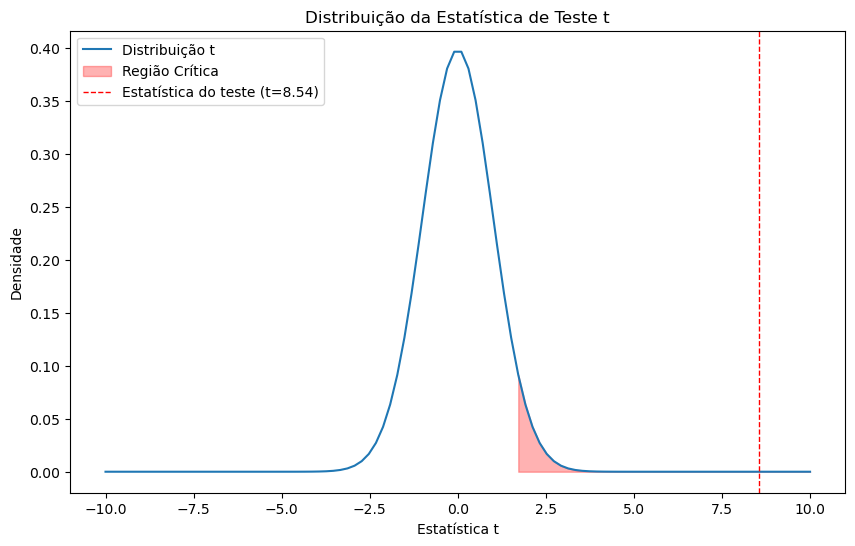

A probabilidade para valores acima de 1.65 é de 5.0%


In [100]:

# Região crítica: sob H0, t está na RC 5% das vezes
alpha = 0.05
critical_value = stats.t.ppf(1-alpha, teste_t.df) 

# Valores de X e Y para plotar a densidade
x = np.linspace(-10,10, 100)
y = stats.t.pdf(x, teste_t.df)

# Distribuição t
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribuição t')

# Preenchimento da Região Crítica
plt.fill_between(x, y, where=(x >= critical_value), color='red', alpha=0.3, label='Região Crítica')

# Linha da estatística do teste
plt.axvline(teste_t.statistic, color='red', linestyle='--', linewidth=1, label=f'Estatística do teste (t={teste_t.statistic:.2f})')

plt.title('Distribuição da Estatística de Teste t')
plt.xlabel('Estatística t')
plt.ylabel('Densidade')
plt.legend()
plt.show()
print(f'A probabilidade para valores acima de {critical_value:.2f} é de {alpha*100}%')

## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

In [105]:
def teste_T_peso_sexo(df,especie, significancia=0.05):
    # Filtrando os pesos por sexo
    peso_m = df[df.sex == 'Male'].body_mass_g
    peso_f = df[df.sex == 'Female'].body_mass_g

    # Realizando o teste t
    teste_t = stats.ttest_ind(peso_m, peso_f)

    print(f'Estatística do teste: {teste_t.statistic}')
    print(f'             P-value: {teste_t.pvalue}')
    print(f'  Graus de liberdade: {teste_t.df}\n')

    # Decisão do teste
    if teste_t.pvalue < significancia:
        print(f"Rejeitamos a hipótese nula. Existe diferença significativa.")
    else:
        print(f"Não rejeitamos a hipótese nula. Não existe diferença significativa")


    # Região crítica: sob H0, t está na RC 5% das vezes
    alpha = 0.05
    critical_value = stats.t.ppf(1-alpha, teste_t.df) 

    # Valores de X e Y para plotar a densidade
    x = np.linspace(-10, 10, 100)
    y = stats.t.pdf(x, teste_t.df)

    # Distribuição t
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='Distribuição t')

    # Preenchimento da Região Crítica
    plt.fill_between(x, y, where=(x >= critical_value), color='red', alpha=0.3, label='Região Crítica')

    # Linha da estatística do teste
    plt.axvline(teste_t.statistic, color='red', linestyle='--', linewidth=1, label=f'Estatística do teste (t={teste_t.statistic:.2f})')

    plt.title(f'Distribuição da Estatística de Teste t para {especie}')
    plt.xlabel('Estatística t')
    plt.ylabel('Densidade')
    plt.legend()
    plt.show()
    print('##################\n')

Teste T para a espécie Adelie:

Estatística do teste: 13.126285923485874
             P-value: 2.2206436307866114e-26
  Graus de liberdade: 144.0

Rejeitamos a hipótese nula. Existe diferença significativa.


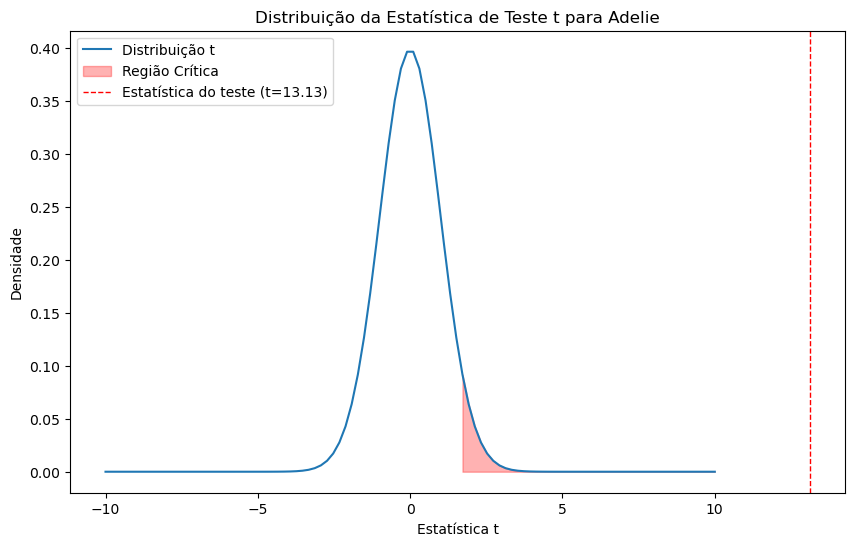

##################

Teste T para a espécie Chinstrap:

Estatística do teste: 5.20773384899266
             P-value: 2.043956471470739e-06
  Graus de liberdade: 66.0

Rejeitamos a hipótese nula. Existe diferença significativa.


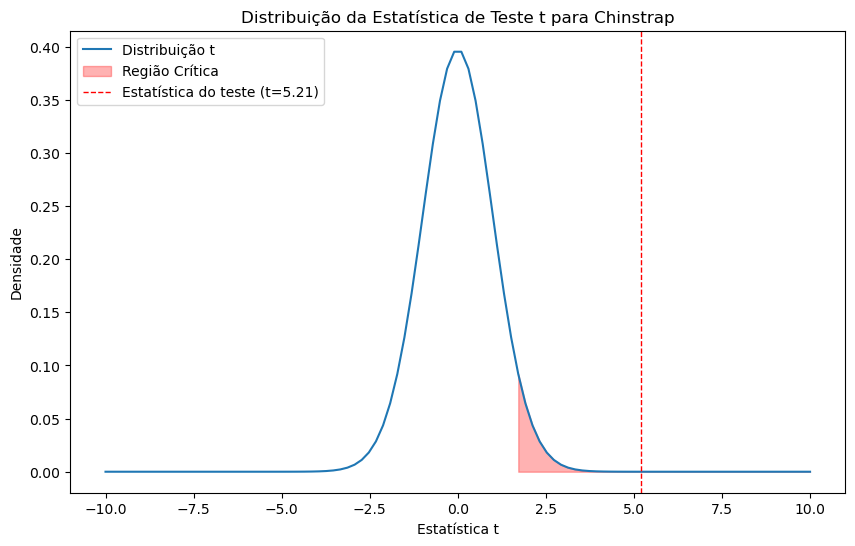

##################

Teste T para a espécie Gentoo:

Estatística do teste: 14.721676481405709
             P-value: 2.133687602018886e-28
  Graus de liberdade: 117.0

Rejeitamos a hipótese nula. Existe diferença significativa.


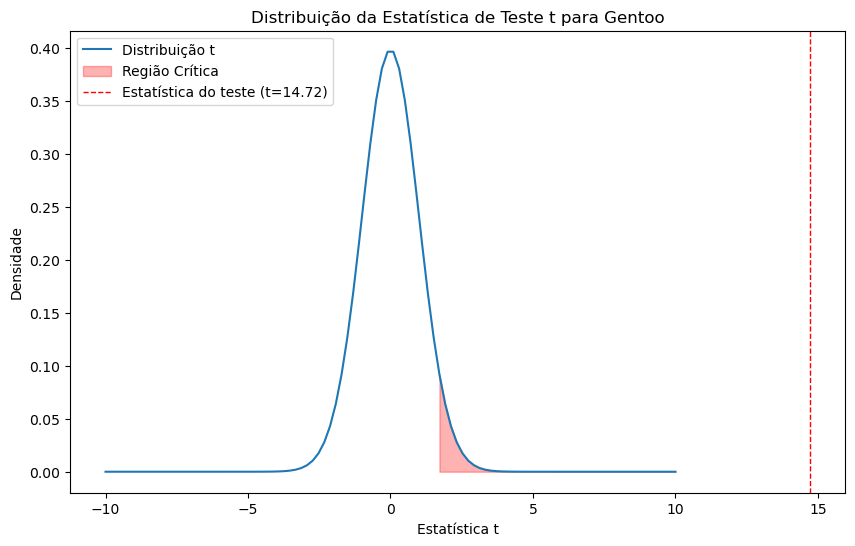

##################



In [106]:
for x in pg.species.unique():
    print(f'Teste T para a espécie {x}:\n')
    teste_T_peso_sexo(pg[pg.species == x],x)